In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of plots we'll create

#read data form csv

df = pd.read_csv('C:/Users/milan/Desktop/Studies/moviesforpythondataset.csv')


In [6]:
#exploring the dataset
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
#checking nan values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col,pct_missing))

name - 0.0%.
rating - 0.010041731872717789%.
genre - 0.0%.
year - 0.0%.
released - 0.0002608242044861763%.
score - 0.0003912363067292645%.
votes - 0.0003912363067292645%.
director - 0.0%.
writer - 0.0003912363067292645%.
star - 0.00013041210224308815%.
country - 0.0003912363067292645%.
budget - 0.2831246739697444%.
gross - 0.02464788732394366%.
company - 0.002217005738132499%.
runtime - 0.0005216484089723526%.


In [8]:
#dropping rows with missing information
df = df.dropna()

In [9]:
#verifying nan% after droping rows

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col,pct_missing))

name - 0.0%.
rating - 0.0%.
genre - 0.0%.
year - 0.0%.
released - 0.0%.
score - 0.0%.
votes - 0.0%.
director - 0.0%.
writer - 0.0%.
star - 0.0%.
country - 0.0%.
budget - 0.0%.
gross - 0.0%.
company - 0.0%.
runtime - 0.0%.


In [10]:
#checking the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#chaning datatypes of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [12]:
#create correct year column by converting release year to str & then extracting the first 4 characters and converting back to int
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
#df

In [25]:
#pd.set_option('display.max_rows', None) #view complete dataset
df = df.sort_values(by=['gross'], inplace=False, ascending=False ) #sort table by gross profit in decending order

In [26]:
#remove duplicates 
df['name'].drop_duplicates().sort_values(ascending=False)

4722    5335
4761    5334
7112    5333
4083    5332
3503    5331
5642    5330
6863    5329
180     5328
4984    5327
6962    5326
3880    5325
5931    5324
7489    5323
5456    5322
5048    5321
3436    5320
6057    5319
4700    5318
5259    5317
6791    5316
5603    5315
4705    5314
6016    5313
5898    5312
3435    5311
713     5310
1676    5309
1265    5308
5968    5307
4371    5306
4991    5305
3266    5304
5925    5303
5823    5302
4610    5301
5315    5300
3744    5299
5769    5298
5829    5297
7451    5296
319     5295
5304    5294
371     5293
374     5292
716     5291
5506    5290
23      5289
4278    5288
4876    5287
5866    5286
6463    5285
7493    5284
6856    5283
5462    5282
3654    5281
2470    5280
4263    5279
296     5278
4998    5277
6092    5276
6112    5275
6277    5274
4924    5273
1267    5272
4339    5271
7062    5270
7144    5269
7560    5268
3726    5267
7065    5266
1314    5265
3784    5264
6771    5263
157     5262
4715    5261
2501    5260
660     5259

Text(0, 0.5, 'Gross Earning')

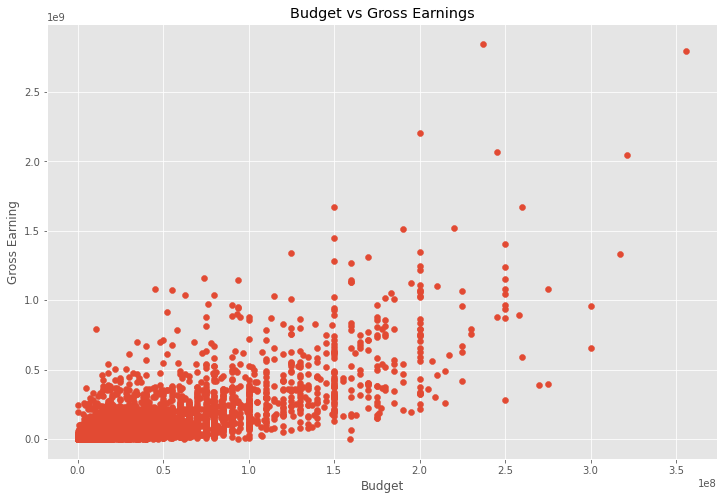

In [27]:
#scatterplot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')

<AxesSubplot:xlabel='budget', ylabel='gross'>

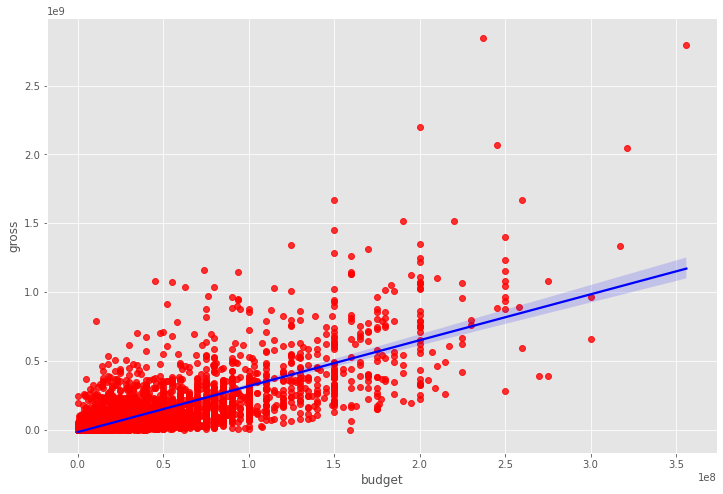

In [28]:
#plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [29]:
#checking correlation 
df.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850     0.025542  
rating      -0.181906 -0.092357  0.140792     0.022021  
genre       -0.244101 -0.071334 -0.059237    -0.069147  
year         0.274321 -0.014333  0.075077     0.998726  
released     0.008501 -0.002407  0.008975    -0.005989  
score        0.222556  0.020656  0.414068     0.061923  
votes        0.614751  0.118470  0.352303     0.203098  
director    -0.029560 -0.008223  0.017433    -0.037371  
writer      -0.035885 -0.003697 -0.017561    -0.025495  
star        -0.000004  0.014082  0.010108    -0.032687  
country      0.060078  0.048569 -0.034477    -0.073569  
budget       0.740247  0.170235  0.318695     0.320312  
gross        1.000000  0.149553  0.275796     0.268721  
company      0.149553  1.000000  0.037585    -0.018806  
runtime      0.275796  0.037585  1.000000     0.075294  
yearcorrect  0.268721 -0.018806  0.075294     1.000000

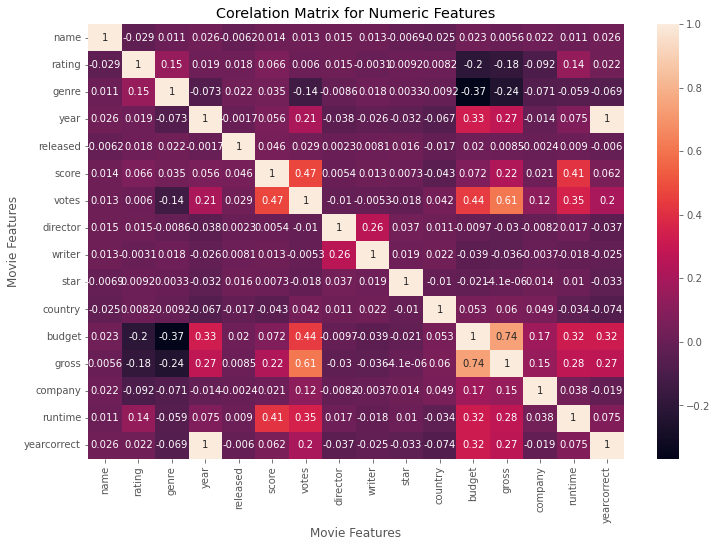

In [30]:
#visualzing the correlation matrix for better readability
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Corelation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
#converting object data into numerical data

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
7480  4388       4      2  2019      1126    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       165    7.1   370000.0       809     481   
7494  1530       4      2  2019      2053    6.8   148000.0       277    1383   
6644   387       5      0  2015      1712    7.3   777000.0      1060    1646   
7247   567       5      0  2018       723    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000.0       452    2862   
7075  3644       5      0  2017       500    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000.0       764     777   
6262  1529       4      2  2013      2082    7.4   585000.0       277    1383   
7072   477       4      7  2017      1561    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1325    7.6   263000.0       193     327   
7055  4119       5      0  2017        45    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1881    7.1   779000.0      1767     837   
6688  2545       4      2  2015      1050    6.4   218000.0      1144     362   
6846   750       5      0  2016      1910    7.8   694000.0       105     513   
7250   343       5      0  2018       565    6.9   404000.0       809     699   
4245  4407       5      0  2003       516    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000.0      1019     479   
7456   755       5      0  2019      1697    6.8   478000.0        96     182   
5878  4950       5      0  2011      1442    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2148    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1394    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       553    6.5   394000.0       768     489   
7450  2091       6      5  2019      2321    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000.0       674    2927   
6869  3260       5      0  2016       509    7.8   572000.0       615     492   
7481   206       4      1  2019      1837    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1803    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1292    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000.0        81     153   
3451  3637       4      0  1999      1778    6.5   748000.0       653    1046   
5667   215       4      1  2010      1679    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000.0       239     390   
6045  4240       5      1  2012       492    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1987    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

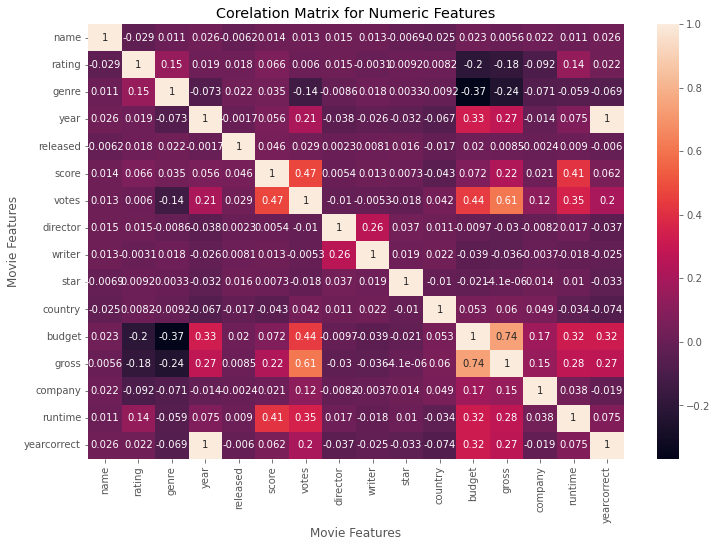

In [32]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Corelation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
#Gross has a high correlation with Budget & votes